In [21]:
import os
import logging
import pickle
from glob import glob

import pairwise_fte
import evaluate_fte
from lib import app


%load_ext autoreload
%autoreload 2

%matplotlib inline


root_dir = os.path.join("../data")
logger = logging.getLogger("main")

In [9]:
# Generate the pose functions if this has not been done before (note this should only be performed once). It will be saved in the root_dir.
functions = pairwise_fte.create_pose_functions(root_dir)

In [10]:
# Configurations for the optimisation. 2017_08_29/top/phantom/run1_1 2017_08_29/top/phantom/flick1_1
data_path = os.path.join("2017_12_16", "top", "phantom", "flick1")
start_frame = 1
end_frame = -1
dlc_thresh = 0.5

In [13]:
# Run the optimisation
pairwise_fte.run(root_dir, data_path, start_frame, end_frame, dlc_thresh, generate_reprojection_videos=True, out_dir_prefix=root_dir)

100%|██████████| 291/291 [00:08<00:00, 34.36 f/s]


In [28]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
pairwise_fte.plot_cheetah(root_dir, data_path, out_dir_prefix=root_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'extrinsic_calib/../data/2017_12_16/top/extrinsic_calib/6_cam_scene_sba.json'

In [29]:
# # DEBUB purposes - if you want to display particular frames to inspect the measurements that are incorporated in the optimisation process.
# # The camera to use.
# cam_num = 1
# # The measurements to display 1 - base prediction, 2 - 3 pairwise measurements. Max is 3.
# pw_values = (1, 2, 3)
# # Frame number to display.
# frame_num = 110
# pairwise_fte.display_test_image(data_dir, cam_num, pw_values, frame_num)

AttributeError: module 'pairwise_fte' has no attribute 'display_test_image'

In [31]:
eval_dir = os.path.join(root_dir, data_path, "fte_pw")
with open(os.path.join(eval_dir, "fte.pickle"), 'rb') as f:
    data = pickle.load(f)
results_dir = os.path.join(eval_dir, "evaluation")
os.makedirs(results_dir, exist_ok=True)
max_delta_acc = evaluate_fte.eval_delta_acc(data, results_dir)
evaluate_fte.eval_model_error(data, results_dir)
evaluate_fte.eval_meas_error(data, results_dir)
Q = [ # model parameters variance
    max_delta_acc[0], max_delta_acc[1], max_delta_acc[2], # x, y, z
    max_delta_acc[3], max_delta_acc[6], 0, max_delta_acc[10], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, #  phi_1, ... , phi_14
    max_delta_acc[4], max_delta_acc[7], max_delta_acc[9], max_delta_acc[11], max_delta_acc[13], max_delta_acc[15], max_delta_acc[17], max_delta_acc[18], max_delta_acc[19], max_delta_acc[20], max_delta_acc[21], max_delta_acc[22], max_delta_acc[23], max_delta_acc[24], # theta_1, ... , theta_n
    max_delta_acc[5], max_delta_acc[8], 0, max_delta_acc[12], max_delta_acc[14], max_delta_acc[16], 0, 0, 0, 0, 0, 0, 0, 0, # psi_1, ... , psi_n
    # ?, ?, ?  # lure's x, y, z variance
]
logger.info(Q)

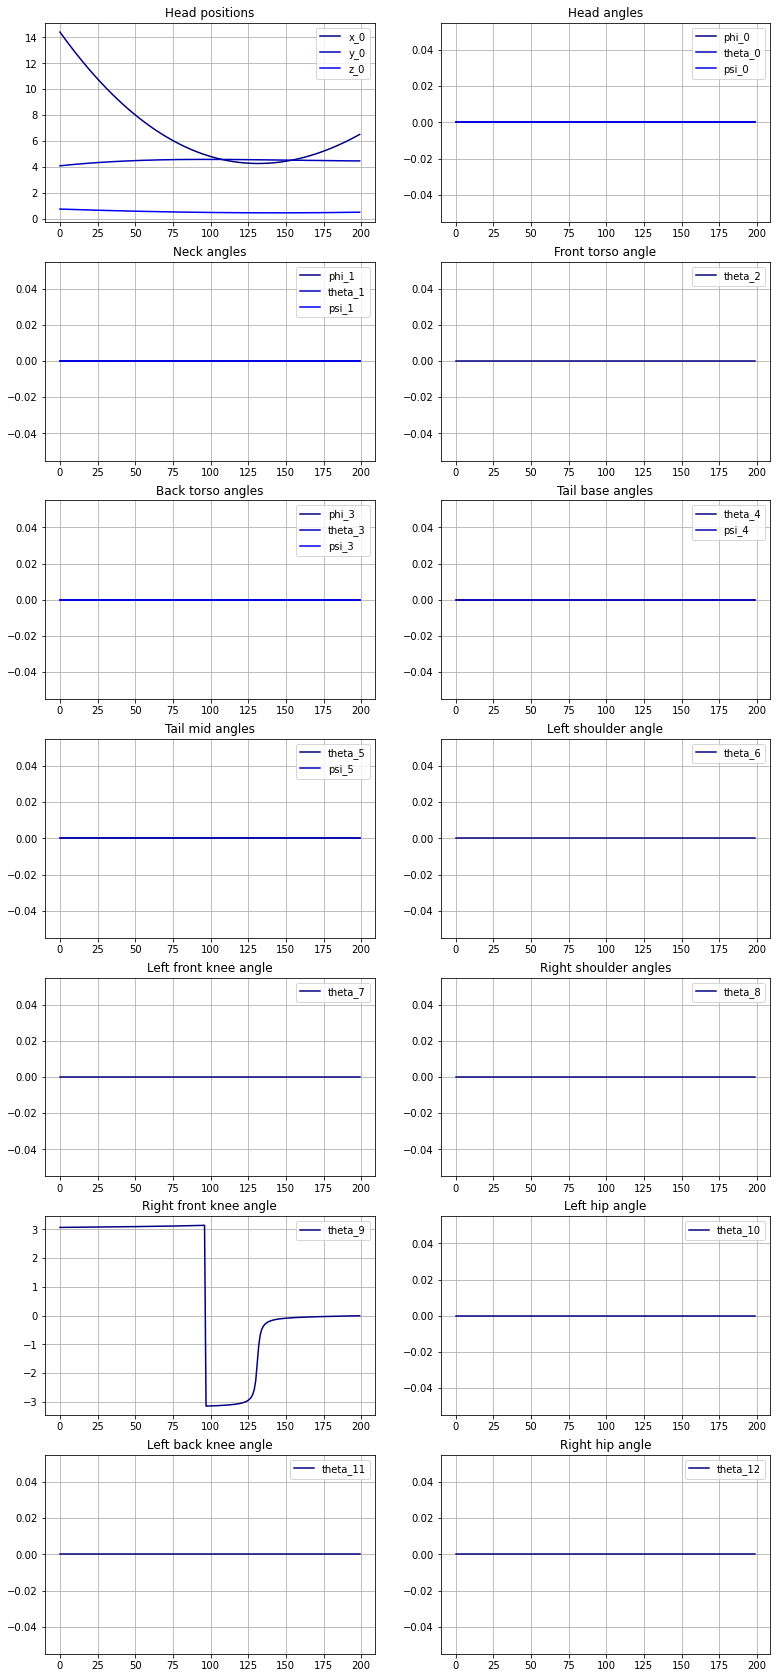

In [34]:
fig_fpath = os.path.join(os.path.join(os.path.join("..", "data"), data_path, "fte_pw"), 'fte.pdf')
with open(os.path.join(os.path.join("..", "data"), data_path, "fte_pw", "fte.pickle"), 'rb') as f:
    pw_file = pickle.load(f)
app.plot_cheetah_states(pw_file["x"], out_fpath=fig_fpath)

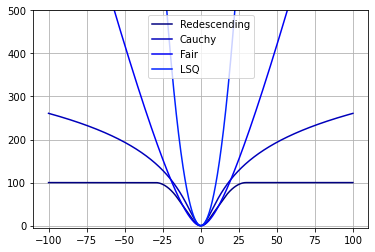

In [35]:
pairwise_fte.plot_cost_functions()